# modelling sea level from temperature

we have 2 data sets:
1. temperature data
2. sea level data

we have a model defined as 

$$
    \begin{align*}
    S_{eq} &= aT+b \\ 
    \frac{\partial S}{\partial t} &= \frac{S_{eq}-S}{\tau}
    \end{align*}
$$

---

We want to predict the sea level from temperature such that it is consistent with the measured sea level data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

ModuleNotFoundError: No module named 'pymc'

len of df_T 1151


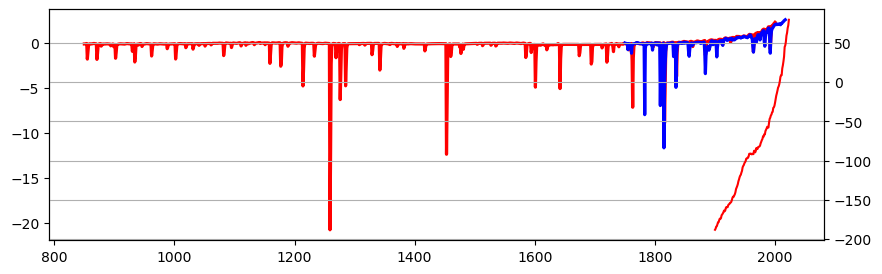

In [101]:
# load data
# df_T_forecast = pd.read_csv('../data/T_forecast_auto_arima.csv', index_col=0)
# df_T = pd.read_csv('../data/processed_temperature_data.csv', index_col=0)
# df_S = pd.read_csv('../data/processed_sea_level_data.csv', index_col=0)
df_T = pd.read_csv('../data/schmidt_11_paleoforcings_cleaned.csv', index_col=0)
df_S = pd.read_csv('../data/dangendorf_data.csv', index_col=0)/10
df_T_forecast = pd.read_csv('../data/noaa_total_forcing.csv', index_col=0)
df_T_forecast_ERF = pd.read_csv('../data/noaa_total_ERF.csv', index_col=0)
# stack df_T with forecast
print('len of df_T', len(df_T))
# print('len of df_T_forecast', len(df_T_forecast))
# df_T = pd.concat([df_T, df_T_forecast])
df_S

# select a column from each
x = df_T['Total forcing [V,S.2,L,G]']
x_forecast = df_T_forecast_ERF['history']
y = df_S['total']
y_std = df_S['std']

# combine on index, include nans
df = pd.concat([x, y, y_std, x_forecast], axis=1)
df.columns = ['Total forcing Schmidt', 'Sea level', 'std', 'Total forcing Noaa']
df.head()

fig, ax = plt.subplots(figsize=(10, 3))
ax2 = ax.twinx()
ax.plot(x, label='Total forcing Schmidt', color='red', lw=2.3)
ax.plot(x_forecast, label='Total forcing Noaa', color='blue', lw=2.3)
ax2.plot(y, label='Sea level', color='red')
# plt.xlim(1750, 2100)
# plt.ylim(-12, 4.5)
plt.grid()
plt.show()



In [102]:
x = []
for i in df.index:
    # if we have Total forcing Noaa use it, otherwise use Total forcing Schmidt if that is not nan
    if pd.notna(df.loc[i, 'Total forcing Noaa']):
        x.append(df.loc[i, 'Total forcing Noaa'])
    elif pd.notna(df.loc[i, 'Total forcing Schmidt']):
        x.append(df.loc[i, 'Total forcing Schmidt'])
    else:
        x.append(np.nan)
        # raise ValueError(f'No total forcing data for {i}')

df['Total forcing'] = x
df.tail(50)

,Total forcing Schmidt,Sea level,std,Total forcing Noaa,Total forcing
1974,1.157924,-81.954690,20.019096,0.732,0.732
1975,1.150627,-80.863708,19.752294,0.344,0.344
1976,1.183951,-77.932993,19.037604,0.776,0.776
1977,0.866125,-75.983058,18.560445,1.088,1.088
1978,1.230275,-73.871460,18.044603,1.160,1.160
1979,1.438078,-72.384497,17.681256,1.213,1.213
1980,1.497896,-69.006984,16.856225,1.355,1.355
1981,1.542972,-69.491677,16.974594,1.387,1.387
1982,1.502360,-66.390056,16.218835,0.149,0.149
1983,1.511454,-66.709040,16.295391,-0.359,-0.359


In [103]:
x = df['Total forcing']
y = df['Sea level']
y_std = df['std']

In [104]:

def plot_data(df_T, df_S):
    # plot data
    fig, ax = plt.subplots(figsize=(10, 3))
    ax2 = ax.twinx()

    # plt.plot(df_T.index, df_T['Annual'], label='Annual mean')
    # plt.plot(df_S.index, df_S['GMSL_noGIA'], label='Annual mean')
    ax.plot(df_T.index, df_T['Annual'], label='Annual mean', color='red')
    ax2.plot(df_S.index, df_S['GMSL_noGIA'], label='Annual mean', color='blue')

    # show uncertainty
    ax.fill_between(df_T.index, df_T['Annual'] - df_T['Annual_uncertainty'], df_T['Annual'] + df_T['Annual_uncertainty'], alpha=0.2, color='red')
    ax2.fill_between(df_S.index, df_S['GMSL_noGIA'] - df_S['uncertainty'], df_S['GMSL_noGIA'] + df_S['uncertainty'], alpha=0.2, color='blue')

    # combine legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='best')

    # add ax labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (°C)', color='red')
    ax2.set_ylabel('Sea Level (mm)', color='blue')

    plt.show()

# plot_data(df_T, df_S)

y = y.dropna()
x = x.dropna()
y_std = y_std.dropna()


In [105]:
x.index[0], x.index[-1], y.index[0], y.index[-1]


cut_head = y.index[0] - x.index[0]
cut_tail = x.index[-1] - y.index[-1]

cut_head, cut_tail
# x.index[1050]

(1050, -6)

# MCMC

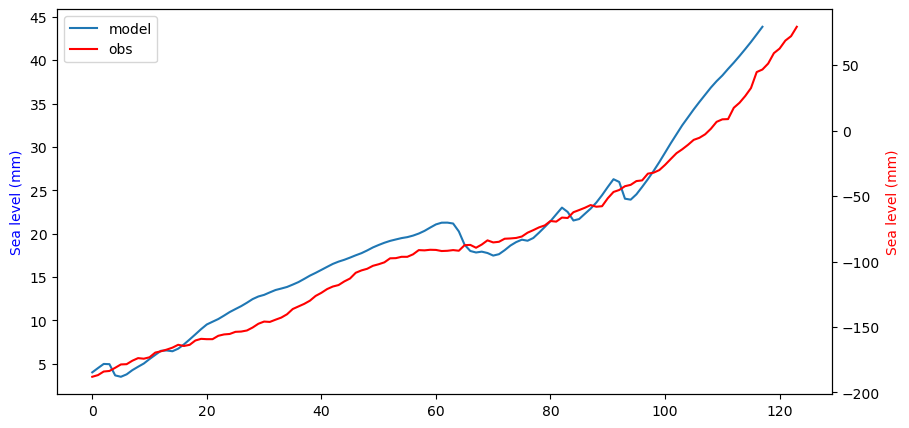

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner

# Assume df_T and df_S are your dataframes with temperature and sea level data
# df_T should have an index of time and a column 'Annual' for temperature anomalies
# df_S should have an index of time and columns 'GMSL_noGIA' for sea level and 'uncertainty' for measurement errors

# Extract time and temperature data
# time = df_T.index.values
# T = df_T['Annual'].values

# # Observed sea level data and uncertainties
# S_obs = df_S['GMSL_noGIA'].values #* 1e-3
# sigma = df_S['uncertainty'].values #* 1e-3
# offset = 100
# how many to cut at head and at tail from x?



F = x.values
S_obs = y.values
sigma = y_std.values


# Define the model function
def get_S(F, a, b, S_0, tau, k, s):
    # Calculate equilibrium sea level

    T_eq = k * F
    S_eq = a * T_eq + b

    # Initialize S
    S = np.zeros(len(F))
    S[0] = S_0
    for i in range(1, len(F)):
        try:
            # print(f'i: {i}, S_eq: {S_eq[i-1]}, S: {S[i-1]}, tau: {tau}')
            S[i] = S[i-1] + ((S_eq[i-1] - S[i-1]) / tau)
        except Exception as e:
            print(e)
            print(f'i: {i}, S_eq: {S_eq[i-1]}, S: {S[i-1]}, tau: {tau}')

    S *= s
    return S

# Define the log prior function
def log_prior(theta):
    a, b, S_0, tau, k, s = theta
    cond1 = 1 < a < 10
    cond2 = 0 < b < 5
    cond3 = -50 < S_0 < 60
    cond4 = 3 < tau < 100
    cond5 = 0 < k < 1
    cond7 = 0 < s < 2
    if cond1 and cond2 and cond3 and cond4 and cond5 and cond7:
        return 0.0  # Uniform prior (log probability is zero within bounds)
    return -np.inf  # Log probability is -infinity outside bounds

# Define the log likelihood function
def log_likelihood(theta, F, S_obs, sigma):
    a, b, S_0, tau, k, s = theta
    S_model = get_S(F, a, b, S_0, tau, k, s)
    # Align S_model and S_obs based on your original offset
    # Adjust this value if necessary
    # print(len(S_model), len(S_obs))
    # print(cut_head, cut_tail)
    # S_model_aligned = S_model[-len(S_obs)-offset:-offset] # TODO: this is weak, we could look in the dataframe for the correct offset
    S_model_aligned = S_model[cut_head:]
    # print(len(S_model_aligned), len(S_obs))
    # Compute the log likelihood assuming Gaussian errors
    return -0.5 * np.sum(((S_obs[:len(S_model_aligned)] - S_model_aligned) / sigma[:len(S_model_aligned)])**2 + np.log(2 * np.pi * sigma[:len(S_model_aligned)]**2))

# Define the full log probability function
def log_probability(theta, T, S_obs, sigma):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, T, S_obs, sigma)


# try it
log_probability([2, 1, -1.00, 2.0, 1, .01], F, S_obs, sigma)


S_model = get_S(F, 2, 1, -1.00, 20.0, 1, 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(S_model[1050:], label='model')
ax.set_ylabel('Sea level (mm)', color='blue')
ax2.plot(S_obs, label='obs', color='red')
ax2.set_ylabel('Sea level (mm)', color='red')

# combine legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')

plt.show()


In [153]:
# check for nan in T, S_obs, sigma
np.isnan(F).any(), np.isnan(S_obs).any(), np.isnan(sigma).any()



(False, False, False)

Running burn-in...


  0%|          | 0/4000 [00:00<?, ?it/s]/Users/tonton/anaconda3/envs/pymc_env/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 4000/4000 [00:00<00:00, 4309.73it/s]


Running production...


100%|██████████| 10000/10000 [00:02<00:00, 4551.01it/s]


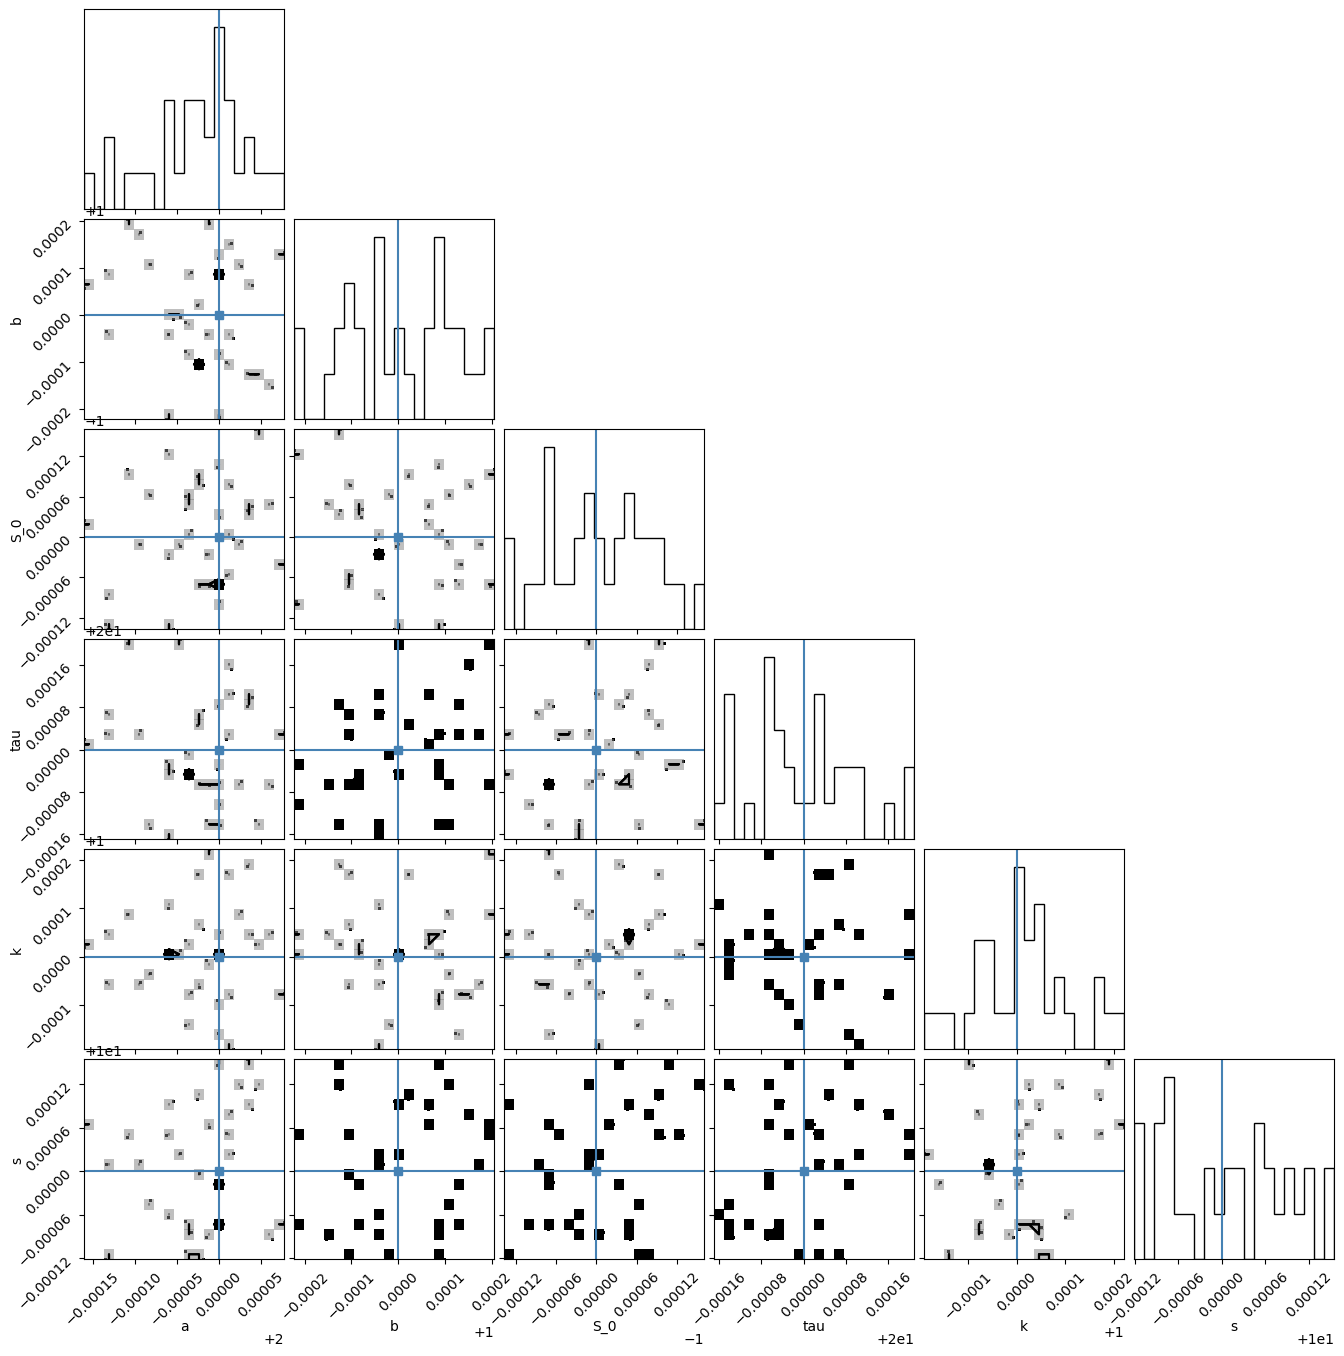

a = 2.000 (+0.000, -0.000)
b = 1.000 (+0.000, -0.000)
S_0 = -1.000 (+0.000, -0.000)
tau = 20.000 (+0.000, -0.000)
k = 1.000 (+0.000, -0.000)
s = 10.000 (+0.000, -0.000)


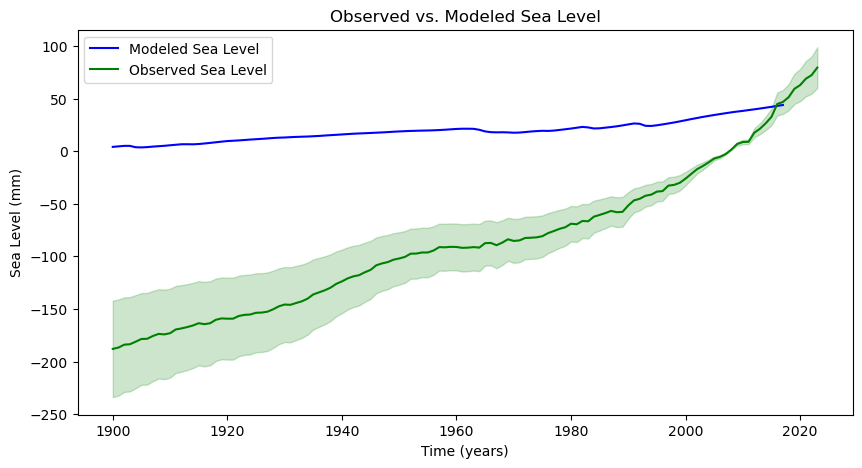

In [154]:

# Initial guess for the parameters
initial = [2, 1, -1.00, 20.0, 1, 10]

# Set up the MCMC sampler
ndim = len(initial)  # Number of parameters
nwalkers = 32  # Number of MCMC walkers
# Initialize the walkers in a small Gaussian ball around the initial guess
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Run MCMC using emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(F, S_obs, sigma))

# Burn-in phase
print("Running burn-in...")
sampler.run_mcmc(pos, 4000, progress=True)
sampler.reset()

# Production run
print("Running production...")
sampler.run_mcmc(None, 10000, progress=True)

# Extract the samples
samples = sampler.get_chain(flat=True)

# Plot posterior distributions
fig = corner.corner(samples, labels=["a", "b", "S_0", "tau", "k", "s"], truths=initial)
plt.show()

# Compute the mean and uncertainties of the parameters
from IPython.display import display, Math
import scipy.stats as stats

param_names = ["a", "b", "S_0", "tau", "k", "s"]
for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "{0} = {1:.3f} (+{2:.3f}, -{3:.3f})".format(param_names[i], mcmc[1], q[1], q[0])
    print(txt)

# Use the median parameters to compute the modeled sea level
best_params = np.median(samples, axis=0)
a_best, b_best, S_0_best, tau_best, k_best, s_best = best_params
S_model_full = get_S(F, a_best, b_best, S_0_best, tau_best, k_best, s_best)
S_model_aligned = S_model_full[cut_head:]

# Plot the observed vs. modeled sea level
plt.figure(figsize=(10, 5))
plt.plot(df_S.index[:-6], S_model_aligned, label='Modeled Sea Level', color='blue')
plt.plot(df_S.index, S_obs, label='Observed Sea Level', color='green')

plt.fill_between(df_S.index, S_obs - sigma, S_obs + sigma, color='green', alpha=0.2)
plt.xlabel('Time (years)')
plt.ylabel('Sea Level (mm)')
plt.title('Observed vs. Modeled Sea Level')
plt.legend()
plt.show()

/var/folders/s5/y8d9ljs52g7bqbgnrq59ltv40000gn/T/ipykernel_21806/725937152.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


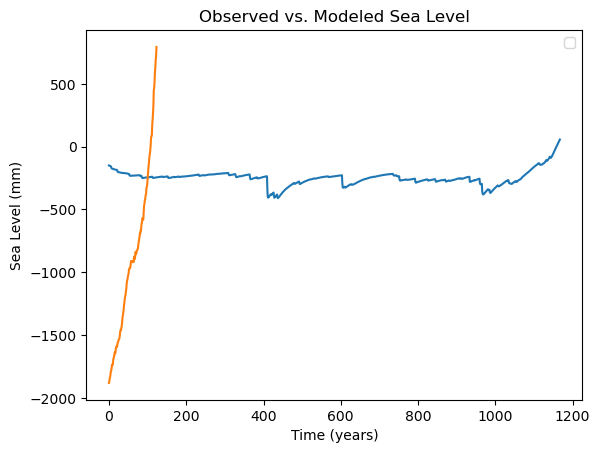

In [ ]:
# index_full = np.arange(2121-275, 2121)

plt.plot(S_model_full)
plt.plot(S_obs)
# asd# plt.fill_between(df_S.index, S_obs - sigma, S_obs + sigma, color='green', alpha=0.2)

plt.xlabel('Time (years)')
plt.ylabel('Sea Level (mm)')
plt.title('Observed vs. Modeled Sea Level')
plt.legend()
plt.show()




100%|██████████| 200000/200000 [00:21<00:00, 9369.37it/s]
/var/folders/s5/y8d9ljs52g7bqbgnrq59ltv40000gn/T/ipykernel_26252/335535145.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend()


{'allowed': 120, 'rejected': 199880}


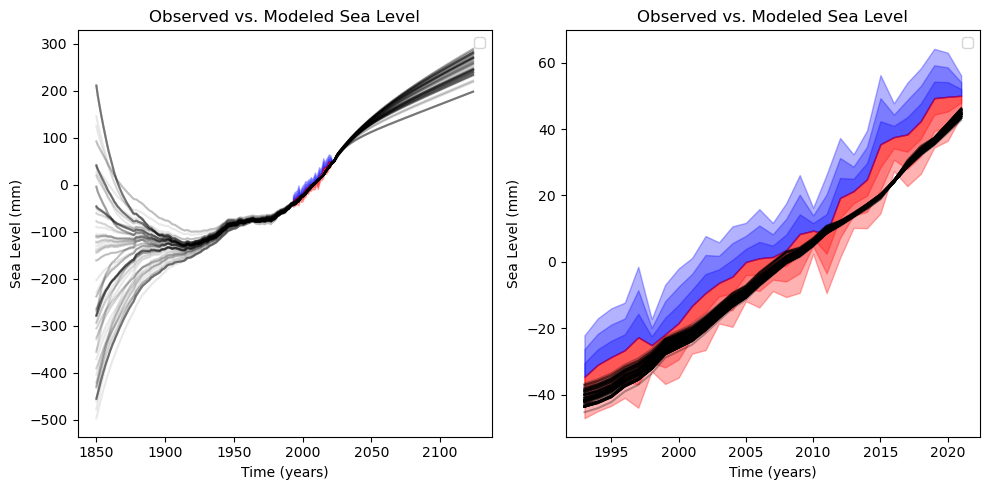

In [ ]:
# show many samples
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
def S_allowed(S_model_full, S_obs, sigma):
    S_cut = S_model_full[143:-103]

    return (np.abs(S_cut-S_obs) < sigma*4.0).all()

decision = {
    'allowed': 0,
    'rejected': 0
}
from tqdm import tqdm
for i in tqdm(range(200000)):
    # Use the median parameters to compute the modeled sea level
    params = samples[-i]
    # S_model_full = np.cumsum(get_dS(T, *params))
    S_model_full = get_S(T, *params)

    if S_allowed(S_model_full, S_obs, sigma):
        decision['allowed'] += 1
        # Plot the observed vs. modeled sea level
        ax[0].plot(time, S_model_full, color='black', alpha=.09)
        ax[1].plot(time[143:-103], S_model_full[143:-103], color='black', alpha=.3)
    else:
        decision['rejected'] += 1
    
    # plt.plot(time, S_model_full, color='red', alpha=0.01)
print(decision)
# observed sea level
# Add uncertainty bounds
for i in range(2):
    # ax[i].plot(time[143:-103], S_obs, label='Observed Sea Level', color='green')
    for j in range(1,4):
        ax[i].fill_between(time[143:-103], S_obs, S_obs + sigma*j, color='blue', alpha=0.3)
        ax[i].fill_between(time[143:-103], S_obs, S_obs - sigma*j, color='red', alpha=0.3)



# Add uncertainty bounds

for axis in ax:
    axis.set_xlabel('Time (years)')
    axis.set_ylabel('Sea Level (mm)')
    axis.set_title('Observed vs. Modeled Sea Level')
    axis.legend()
plt.tight_layout()
plt.show()
